# STEP 2: Pseudocode of the multi-armed bandit problem

Define δ

Define N (number of trials)

Download historical data for the prices of a list of stocks that we are interested in

Turn the prices into returns.

Estimate the correlation structure and risk level.

Filter the list of the stocks to select a basket of K assets

For 1 to N do:

Choose portfolio of stocks and give them weights.

Find the returns that this portfolio gives.

# STEP 3: Collect data

## Financial companies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import seaborn as sns
from numpy.random import rand, seed

Choose tickers

In [2]:
tickers_fin = ["JPM","WFC","BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP",
           "PRU", "SCHW"]

Collect data for the period Sept and Oct 2008

In [3]:
df_fin = pd.DataFrame()
for i in tickers_fin:
  ydata = yf.download(i, start = '2008-09-01', end = '2008-11-01')
  df_fin[i] = ydata['Adj Close']
df_fin.index = pd.to_datetime(ydata.index, format='%Y%m%d')
df_fin.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW
Date,,,,,,,,,,,,,
2008-09-02,26.480583,20.872437,25.531290,148.928192,129.483078,21.174292,30.126410,8.322878,49.117054,34.988831,31.773907,44.671402,19.997490
2008-09-03,26.969582,20.738686,26.305449,152.824829,131.276657,21.553684,30.761030,8.395541,49.571815,35.565228,31.992884,45.859718,20.022301
2008-09-04,25.747093,19.842529,24.421926,142.615677,126.021240,20.703318,29.426130,7.873707,48.655552,33.750340,30.303696,44.394524,19.484735
2008-09-05,26.894867,20.865753,25.722836,148.616455,127.853897,21.416332,30.170176,8.567280,49.685520,34.825249,30.812017,45.421326,19.923058
2008-09-08,28.219240,22.444059,27.718094,158.357986,132.937119,22.201281,31.563429,9.075903,51.350849,37.956490,31.687895,48.986256,20.857588


## Non-financial companies

In [4]:
tickers_nfin = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "EQIX", "DUK",
                "NFLX", "GE", "APA", "F", "REGN", "CMS"]

In [5]:
df_nfin = pd.DataFrame()
for i in tickers_nfin:
  ydata = yf.download(i, start = '2008-09-01', end = '2008-11-01')
  df_nfin[i] = ydata['Adj Close']
df_nfin.index = pd.to_datetime(ydata.index, format='%Y%m%d')
df_nfin.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,KR,PFE,XOM,WMT,DAL,CSCO,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,
2008-09-02,10.590397,10.190771,44.533047,42.738346,8.105466,16.363979,63.139462,26.190973,4.405714,115.751549,84.531815,2.665931,20.580000,8.152999
2008-09-03,10.586588,10.206717,44.936188,42.838665,8.052430,16.060818,62.515472,25.858681,4.415714,115.913864,85.438019,2.701398,21.799999,8.057152
2008-09-04,10.380877,9.924971,43.853394,42.831505,7.919844,15.351137,60.448521,26.115454,4.267143,112.384117,87.465034,2.594997,20.379999,8.069131
2008-09-05,10.236117,9.839912,43.553890,43.519333,7.787258,15.337356,60.440723,26.145662,4.237143,113.114403,88.577942,2.606820,19.070000,7.991254
2008-09-08,10.399925,10.174821,44.216248,44.422092,7.592797,16.102158,60.456345,26.991510,4.307143,118.023643,87.258400,2.689576,18.900000,8.236865


Couldn't get data for non financial tickers("HCP"), and from financial tickers("BBT", "STI").

## Compute financial returns

Financial Companies

In [6]:
df_fin_returns = df_fin.pct_change(axis=0) # daily returns
df_fin_returns = df_fin_returns.dropna()
df_fin_returns

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW
Date,,,,,,,,,,,,,
2008-09-03,0.018466,-0.006408,0.030322,0.026165,0.013852,0.017918,0.021065,0.008731,0.009259,0.016474,0.006892,0.026601,0.001241
2008-09-04,-0.045328,-0.043212,-0.071602,-0.066803,-0.040033,-0.039453,-0.043396,-0.062156,-0.018484,-0.051030,-0.052799,-0.031949,-0.026848
2008-09-05,0.044579,0.051567,0.053268,0.042077,0.014542,0.034440,0.025285,0.088087,0.021169,0.031849,0.016774,0.023129,0.022496
2008-09-08,0.049243,0.075641,0.077568,0.065548,0.039758,0.036652,0.046180,0.059368,0.033517,0.089913,0.028426,0.078486,0.046907
2008-09-09,-0.050060,-0.071216,-0.063634,-0.070866,-0.047488,-0.055392,-0.066327,-0.042940,-0.051185,-0.066284,-0.056269,-0.060292,-0.068596
2008-09-10,-0.001773,0.017004,-0.003690,-0.010593,-0.025236,-0.006551,-0.036634,-0.044867,-0.027316,0.001758,-0.002092,-0.000251,0.012772
2008-09-11,0.057107,0.067824,0.020370,-0.003748,-0.003554,0.056201,-0.005396,0.019108,0.030482,0.016674,0.015723,0.031086,0.029844
2008-09-12,-0.011525,0.012998,0.020569,-0.034927,-0.017959,0.005648,-0.038233,0.044531,-0.000684,-0.008632,0.004903,-0.020301,-0.021633
2008-09-15,-0.101287,-0.095946,-0.213101,-0.151448,-0.121328,-0.023943,-0.135375,-0.073298,-0.034946,-0.026992,-0.089089,-0.099889,-0.052983


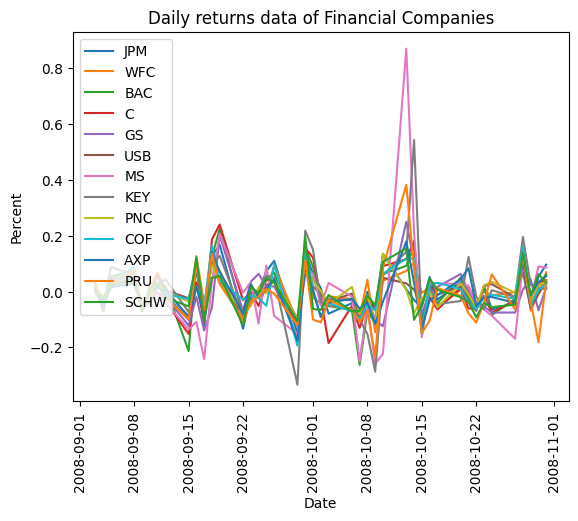

In [7]:
plt.plot(df_fin_returns.index,df_fin_returns)
plt.legend(tickers_fin, loc='upper left')
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Daily returns data of Financial Companies")
plt.xticks(rotation=90)
plt.show()

Non-financial companies

In [8]:
df_nfin_returns = df_nfin.pct_change(axis=0) # daily returns
df_nfin_returns = df_nfin_returns.dropna()
df_nfin_returns

,KR,PFE,XOM,WMT,DAL,CSCO,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,
2008-09-03,-0.000360,0.001565,0.009053,0.002347,-0.006543,-0.018526,-0.009883,-0.012687,0.002270,0.001402,0.010720,0.013304,0.059281,-0.011756
2008-09-04,-0.019431,-0.027604,-0.024096,-0.000167,-0.016465,-0.044187,-0.033063,0.009930,-0.033646,-0.030451,0.023725,-0.039387,-0.065138,0.001487
2008-09-05,-0.013945,-0.008570,-0.006830,0.016059,-0.016741,-0.000898,-0.000129,0.001157,-0.007030,0.006498,0.012724,0.004556,-0.064279,-0.009651
2008-09-08,0.016003,0.034036,0.015208,0.020744,-0.024972,0.049865,0.000258,0.032351,0.016521,0.043401,-0.014897,0.031746,-0.008915,0.030735
2008-09-09,0.023810,-0.047022,-0.045721,-0.014032,-0.041909,-0.017116,-0.044253,0.012870,-0.046766,-0.033345,-0.083994,-0.032967,-0.020106,-0.024000
2008-09-10,0.001073,-0.002193,0.027163,0.014559,-0.043743,0.000871,-0.019034,-0.012707,0.000348,-0.001067,0.047837,0.015909,0.049136,0.009687
2008-09-11,0.007863,0.010440,0.004120,0.018542,0.027954,0.002610,0.047062,0.019586,0.002782,0.002492,0.034643,0.046980,0.059187,0.002952
2008-09-12,-0.010993,0.012507,0.025675,-0.012031,0.004944,0.017788,0.011040,0.004391,0.021506,-0.050071,0.031006,0.049145,0.006317,0.014716
2008-09-15,-0.046611,-0.030612,-0.054839,-0.012498,-0.009840,-0.046036,-0.060835,-0.024044,-0.045501,-0.080374,-0.071181,-0.034623,-0.012554,-0.039883


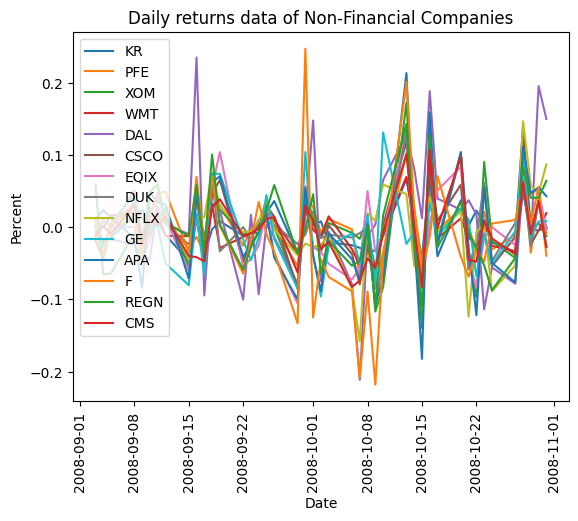

In [9]:
plt.plot(df_nfin_returns.index,df_nfin_returns)
plt.legend(tickers_nfin, loc='upper left')
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Daily returns data of Non-Financial Companies")
plt.xticks(rotation=90)
plt.show()

# Step 4: Correlation matrix

We combine the two list of returns:

In [10]:
df_returns = pd.DataFrame()

In [11]:
df_returns = pd.concat([df_nfin_returns, df_fin_returns],axis=1)

In [12]:
df_returns

,KR,PFE,XOM,WMT,DAL,CSCO,EQIX,DUK,NFLX,GE,...,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-03,-0.000360,0.001565,0.009053,0.002347,-0.006543,-0.018526,-0.009883,-0.012687,0.002270,0.001402,...,0.026165,0.013852,0.017918,0.021065,0.008731,0.009259,0.016474,0.006892,0.026601,0.001241
2008-09-04,-0.019431,-0.027604,-0.024096,-0.000167,-0.016465,-0.044187,-0.033063,0.009930,-0.033646,-0.030451,...,-0.066803,-0.040033,-0.039453,-0.043396,-0.062156,-0.018484,-0.051030,-0.052799,-0.031949,-0.026848
2008-09-05,-0.013945,-0.008570,-0.006830,0.016059,-0.016741,-0.000898,-0.000129,0.001157,-0.007030,0.006498,...,0.042077,0.014542,0.034440,0.025285,0.088087,0.021169,0.031849,0.016774,0.023129,0.022496
2008-09-08,0.016003,0.034036,0.015208,0.020744,-0.024972,0.049865,0.000258,0.032351,0.016521,0.043401,...,0.065548,0.039758,0.036652,0.046180,0.059368,0.033517,0.089913,0.028426,0.078486,0.046907
2008-09-09,0.023810,-0.047022,-0.045721,-0.014032,-0.041909,-0.017116,-0.044253,0.012870,-0.046766,-0.033345,...,-0.070866,-0.047488,-0.055392,-0.066327,-0.042940,-0.051185,-0.066284,-0.056269,-0.060292,-0.068596
2008-09-10,0.001073,-0.002193,0.027163,0.014559,-0.043743,0.000871,-0.019034,-0.012707,0.000348,-0.001067,...,-0.010593,-0.025236,-0.006551,-0.036634,-0.044867,-0.027316,0.001758,-0.002092,-0.000251,0.012772
2008-09-11,0.007863,0.010440,0.004120,0.018542,0.027954,0.002610,0.047062,0.019586,0.002782,0.002492,...,-0.003748,-0.003554,0.056201,-0.005396,0.019108,0.030482,0.016674,0.015723,0.031086,0.029844
2008-09-12,-0.010993,0.012507,0.025675,-0.012031,0.004944,0.017788,0.011040,0.004391,0.021506,-0.050071,...,-0.034927,-0.017959,0.005648,-0.038233,0.044531,-0.000684,-0.008632,0.004903,-0.020301,-0.021633
2008-09-15,-0.046611,-0.030612,-0.054839,-0.012498,-0.009840,-0.046036,-0.060835,-0.024044,-0.045501,-0.080374,...,-0.151448,-0.121328,-0.023943,-0.135375,-0.073298,-0.034946,-0.026992,-0.089089,-0.099889,-0.052983


In [13]:
zero_values = (df_returns == 0).sum().sum()

if zero_values > 0:
    print(f"There are {zero_values} zero values in the dataset.")
else:
    print("There are no zero values in the dataset.")

There are 3 zero values in the dataset.


In [14]:
df_returns = df_returns.replace(0, 0.01)

zero_values = (df_returns == 0).sum().sum()

if zero_values > 0:
    print(f"There are {zero_values} zero values in the dataset.")
else:
    print("There are no zero values in the dataset.")

There are no zero values in the dataset.


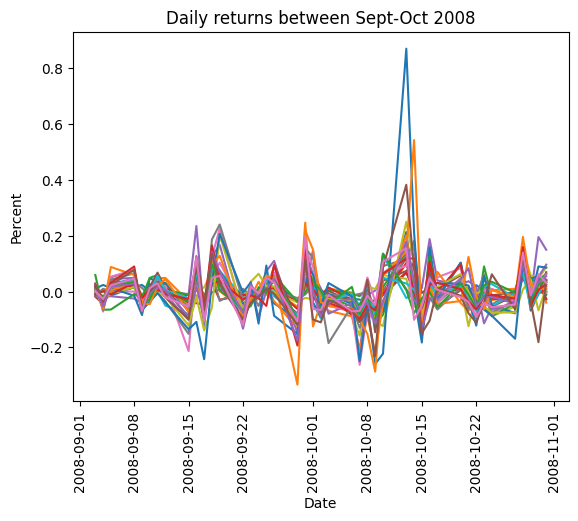

In [15]:
plt.plot(df_returns.index,df_returns)
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Daily returns between Sept-Oct 2008")
plt.xticks(rotation=90)
plt.show()

Compute the correlation matrix

In [16]:
correlation_matrix = df_returns.corr()

In [17]:
correlation_matrix

,KR,PFE,XOM,WMT,DAL,CSCO,EQIX,DUK,NFLX,GE,...,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW
KR,1.000000,0.678727,0.682164,0.719101,0.582101,0.718785,0.498876,0.620161,0.430027,0.423593,...,0.548134,0.526926,0.513936,0.566829,0.477899,0.442177,0.568240,0.610402,0.439126,0.578730
PFE,0.678727,1.000000,0.814427,0.784545,0.470394,0.827935,0.651960,0.697747,0.476899,0.556435,...,0.682374,0.654293,0.692298,0.767202,0.651672,0.541611,0.707037,0.811972,0.635997,0.623299
XOM,0.682164,0.814427,1.000000,0.813531,0.286487,0.810033,0.707328,0.807550,0.461526,0.451754,...,0.484337,0.582451,0.554304,0.634495,0.408785,0.433090,0.586769,0.672514,0.601032,0.546693
WMT,0.719101,0.784545,0.813531,1.000000,0.459232,0.833895,0.572994,0.679876,0.626155,0.558394,...,0.484066,0.440333,0.618618,0.562038,0.459337,0.511406,0.675682,0.641287,0.599701,0.647081
DAL,0.582101,0.470394,0.286487,0.459232,1.000000,0.445254,0.431524,0.224743,0.481221,0.346717,...,0.461114,0.322715,0.486203,0.439652,0.397063,0.403470,0.505415,0.462684,0.280200,0.542431
CSCO,0.718785,0.827935,0.810033,0.833895,0.445254,1.000000,0.786882,0.688168,0.699343,0.657158,...,0.635401,0.599888,0.688679,0.617077,0.459416,0.582907,0.742749,0.744538,0.679455,0.757432
EQIX,0.498876,0.651960,0.707328,0.572994,0.431524,0.786882,1.000000,0.530777,0.610168,0.605572,...,0.602125,0.582868,0.627353,0.573751,0.372756,0.536895,0.636392,0.719869,0.623644,0.723779
DUK,0.620161,0.697747,0.807550,0.679876,0.224743,0.688168,0.530777,1.000000,0.398252,0.297068,...,0.354352,0.392924,0.395745,0.559593,0.212803,0.382474,0.425307,0.528129,0.482296,0.383075
NFLX,0.430027,0.476899,0.461526,0.626155,0.481221,0.699343,0.610168,0.398252,1.000000,0.498654,...,0.476185,0.231463,0.470364,0.306551,0.161626,0.444965,0.495256,0.404196,0.375403,0.563079
GE,0.423593,0.556435,0.451754,0.558394,0.346717,0.657158,0.605572,0.297068,0.498654,1.000000,...,0.696722,0.311549,0.719808,0.249676,0.494459,0.739120,0.700754,0.626061,0.526077,0.728629


Heatmap of the correlation matrix

1)

<Axes: >

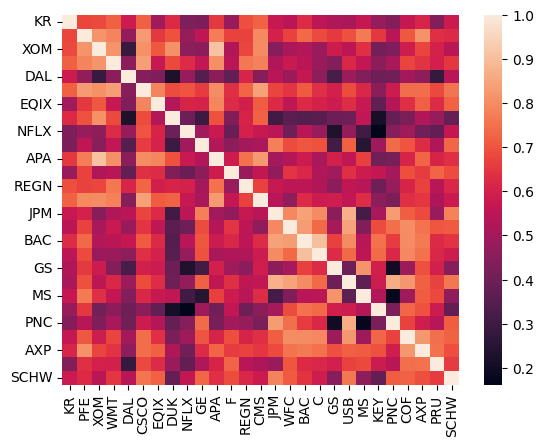

In [18]:
sns.heatmap(correlation_matrix)

2)

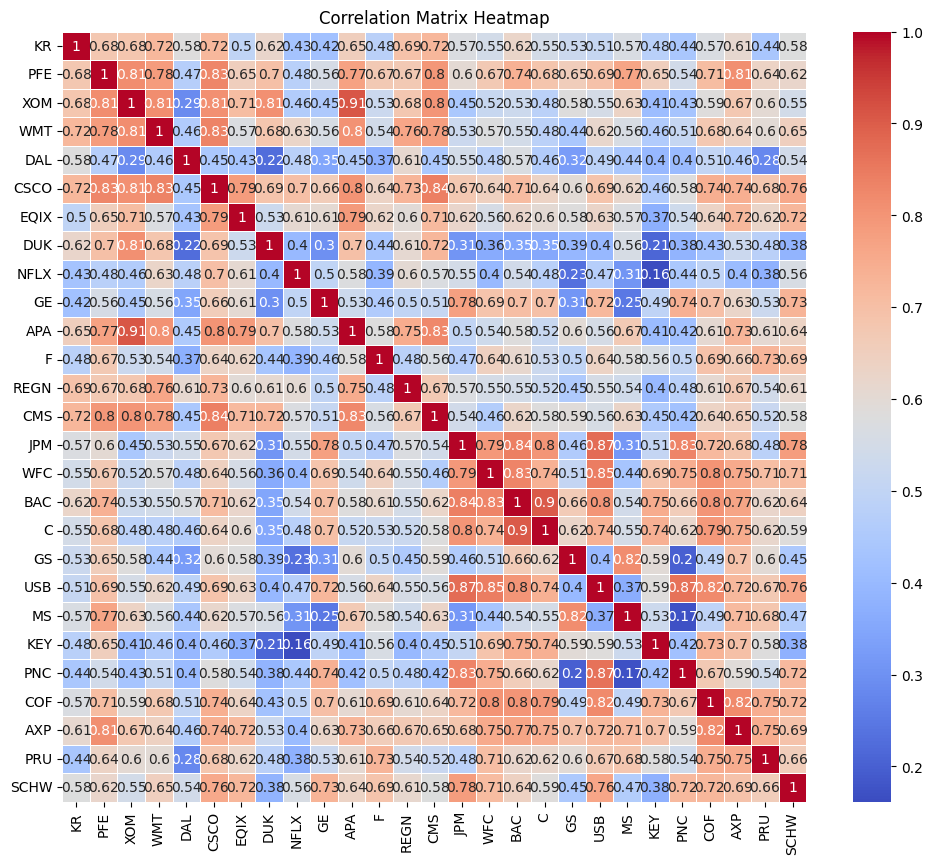

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Sort the securities:

We first calculate the average correlation for each security

In [20]:
maximum_corr = []

In [21]:
for i in correlation_matrix.columns:
  max_corr = correlation_matrix[i].drop(i).max()
  maximum_corr.append([i,f'{max_corr*100:.2f}%'])

In [22]:
maximum_corr = pd.DataFrame(maximum_corr,columns=['Tickers', 'Max Correlation'])

In [23]:
maximum_corr

,Tickers,Max Correlation
0,KR,72.29%
1,PFE,82.79%
2,XOM,90.92%
3,WMT,83.39%
4,DAL,61.20%
5,CSCO,84.08%
6,EQIX,78.82%
7,DUK,80.75%
8,NFLX,69.93%
9,GE,77.62%


Then we sort the securities based on average correlation

In [24]:
sort = maximum_corr.sort_values(by='Max Correlation', ascending=False)

In [25]:
sort

,Tickers,Max Correlation
10,APA,90.92%
2,XOM,90.92%
17,C,90.44%
16,BAC,90.44%
14,JPM,87.49%
19,USB,87.49%
22,PNC,86.56%
15,WFC,84.52%
5,CSCO,84.08%
13,CMS,84.08%


Create two list for the high-correlated, and not correlated stocks.

First, we would set a threshold over the mean:

In [26]:
maximum_corr['Max Correlation'].str.rstrip('%').astype(float)

0     72.29
1     82.79
2     90.92
3     83.39
4     61.20
5     84.08
6     78.82
7     80.75
8     69.93
9     77.62
10    90.92
11    72.55
12    76.17
13    84.08
14    87.49
15    84.52
16    90.44
17    90.44
18    81.53
19    87.49
20    81.53
21    74.96
22    86.56
23    82.14
24    82.06
25    75.00
26    78.33
Name: Max Correlation, dtype: float64

In [27]:
maximum_corr['Numerical correlation'] = maximum_corr['Max Correlation'].str.rstrip('%').astype(float)
maximum_corr

,Tickers,Max Correlation,Numerical correlation
0,KR,72.29%,72.29
1,PFE,82.79%,82.79
2,XOM,90.92%,90.92
3,WMT,83.39%,83.39
4,DAL,61.20%,61.20
5,CSCO,84.08%,84.08
6,EQIX,78.82%,78.82
7,DUK,80.75%,80.75
8,NFLX,69.93%,69.93
9,GE,77.62%,77.62


In [28]:
threshold = maximum_corr['Numerical correlation'].mean()
threshold

81.03703703703704

Then, we create the two lists, for high correlated, and low correlated:

In [29]:
high_corr_assets = maximum_corr[maximum_corr['Numerical correlation'] > threshold]['Tickers'].tolist()
low_corr_assets = maximum_corr[maximum_corr['Numerical correlation'] <= threshold]['Tickers'].tolist()

In [30]:
print("high_corr_assets",high_corr_assets)
print("low_corr_assets",low_corr_assets)

high_corr_assets ['PFE', 'XOM', 'WMT', 'CSCO', 'APA', 'CMS', 'JPM', 'WFC', 'BAC', 'C', 'GS', 'USB', 'MS', 'PNC', 'COF', 'AXP']
low_corr_assets ['KR', 'DAL', 'EQIX', 'DUK', 'NFLX', 'GE', 'F', 'REGN', 'KEY', 'PRU', 'SCHW']


# Step 6: UBC algorithm

### a) pseudocode


Initialize:

N(a) = 0 for all a

Q(a) = 0 for all a

For each round:

For each arm a:

If N(a) > 0:

  UCB(a) = Q(a) + sqrt((2 * log(total count of rounds)) / N(a))

Else:

  UCB(a) = Infinity
  
a_max = argmax_a UCB(a) # Choose the arm which has maximum UCB

Reward = pullBandit(a_max) # Pull the chosen arm and get the reward

N(a_max) = N(a_max) + 1 # Increment the count of chosen arm

Q(a_max) = Q(a_max) + (Reward - Q(a_max)) / N(a_max) # Update the estimated value of chosen arm

In this pseudocode:

• N(a) is the number of times action a has been selected.

• Q(a) is the estimated value of action a.

• UCB(a) is the upper confidence bound of action a.

• pullBandit(a) is a function to pull arm a of the bandit and it returns a reward.


## b) Python implementation

In [31]:
# Read stock price information

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import rand, seed


def optimal_action(qvalue, eps):  # noQA E203
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:  # noQA E203
                break
    elif action_hat[0].shape[0] > 1:  # noQA E203
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):  # noQA E203
            if randnum < (aa + 1) / action_hat[0].shape[0]:  # noQA E203
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new


In [32]:
pdata = df_returns.to_numpy()
pdata_dates = pd.to_datetime(df_returns.index, format='%Y-%m-%d')


#	Bandit problem for stock selection
NK = pdata.shape[1]

EPSILON = 0.0    # e-greedy setting TURNED OFF
ALPHA =0.9
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

#	NEW PARAMETER
UCB_WEIGHT =1.0    # UCB setting TURNED ON
seed(1234)
reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))
reward_queue = np.zeros((HOLD,2))

for run in range(NEPISODES):
# Initialize q function and actions record
  qvalue = np.zeros((NK))
  qvalue_up = np.zeros((NK))
  nactions = np.zeros((NK))

  for tt in range(TMAX):
    aa_opt = optimal_action(qvalue_up,EPSILON)
    nactions[aa_opt] += 1

  #	Compute reward as return over holding period
    reward_queue[HOLD-1,0] = (pdata[tt+HOLD,aa_opt]-pdata[tt,aa_opt])/pdata[tt,aa_opt]
    reward_queue[HOLD-1,1] = aa_opt

#	Update Q function using action chosen HOLD days before

    qvalue = reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, ALPHA)

    #qvalue = reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, 1/nactions[aa_opt])
    #print(qvalue)

   #	Upper-confidence adjustment

    qvalue_up = np.zeros((NK))
    for aa in range(NK):
      # If an action has not been visited simply give it the maximum value across actions
      if nactions[aa] == 0:
        qvalue_up[aa] = np.max(qvalue_up) +1.0
      else:
        qvalue_up[aa] = qvalue[aa] + UCB_WEIGHT * np.sqrt(np.log(tt+1)/nactions[aa])

    reward_queue[0:HOLD-1,:] = reward_queue[1:HOLD,:]
    reward_avg[tt] += reward_queue[HOLD-1,0]/NEPISODES
    optimal_avg[tt] += (aa_opt==np.argmax((pdata[tt+HOLD,:]-pdata[tt,:])/pdata[tt,:]))/NEPISODES

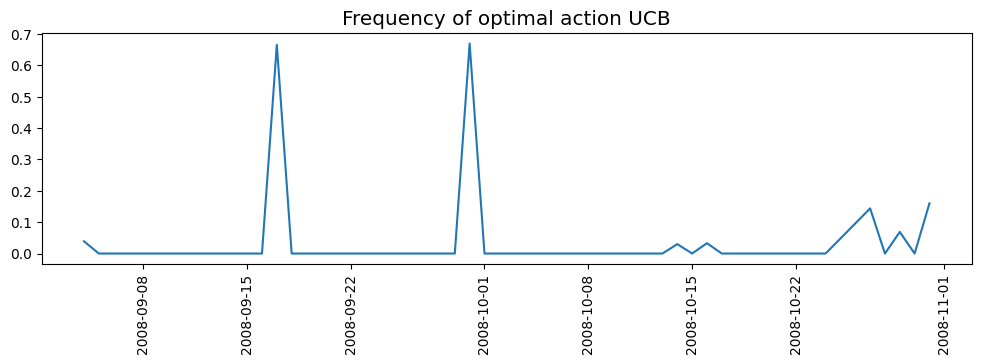

In [33]:
plt.plot(pdata_dates[HOLD:pdata.shape [0] ],optimal_avg)

plt.title("Frequency of optimal action UCB", fontsize='x-large')
plt.xticks(rotation=90)
fig = plt.gcf()

fig.set_size_inches(12, 3)

plt.show()

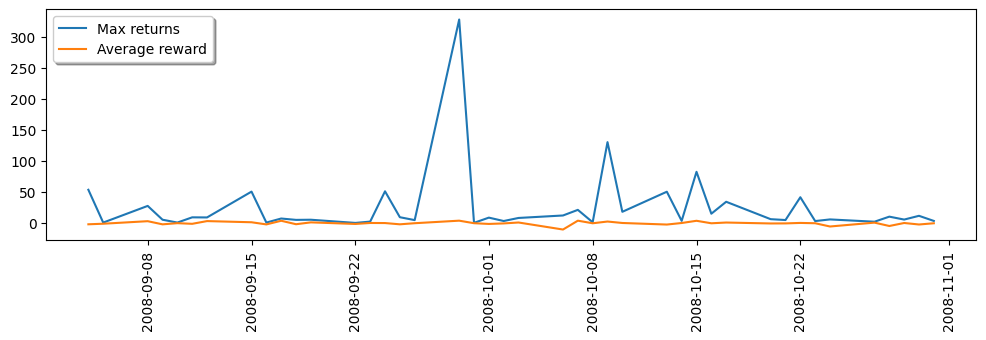

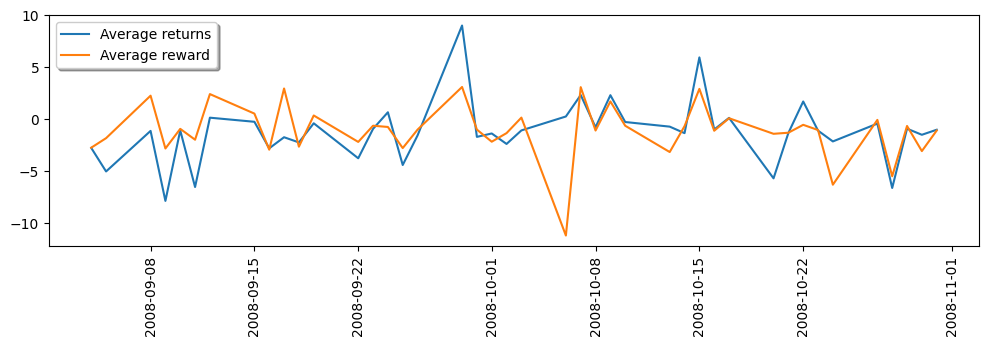

Optimal Rewards 0.04311904761904765
Average Rewards -1.1251549221198045
Average annualized return from holding the equally-weighted portfolio -1.0 0.0
Average annualized return from holding the Bandit portfolio -1.0 41.16853993417384


In [34]:
plt.plot(pdata_dates[HOLD:pdata.shape [0] ],np.max((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata [0:TMAX,:] , axis=1), label='Max returns')

plt.plot(pdata_dates[HOLD:pdata.shape [0] ],reward_avg, label='Average reward')
plt.xticks(rotation=90)
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 3)
plt.show()

plt.plot(pdata_dates[HOLD:pdata.shape[0] ],np.mean((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:], axis=1), label='Average returns')
plt.plot(pdata_dates[HOLD:pdata.shape[0]],reward_avg, label='Average reward')
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(12, 3)
plt.show()

#	Average frequency of optimal action
print("Optimal Rewards",np.mean(optimal_avg))

#	Average reward across steps
print("Average Rewards",np.mean(reward_avg))

#	Average annualized return from holding the equally-weighted portfolio
print("Average annualized return from holding the equally-weighted portfolio",(1 + np.mean((pdata[HOLD:pdata.shape[0] ,:]-pdata[0:TMAX,:])/pdata[0:TMAX,:])) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(np.mean((pdata))))

#	Average annualized return from holding the Bandit portfolio
print("Average annualized return from holding the Bandit portfolio",(1+np.mean(reward_avg)) ** (250 / HOLD) - 1 , np.sqrt(250 / HOLD) * np.std(reward_avg))

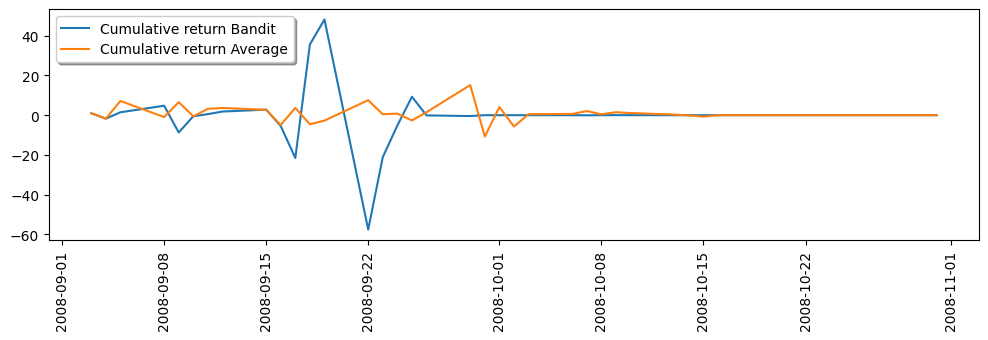

In [35]:
return_cumulative = np.zeros((TMAX+1,2))
return_cumulative[0,0] = 1
return_cumulative[0,1] = 1
for tt in range(1,TMAX+1):
  return_cumulative[tt,0] = return_cumulative[tt-1,0] * ( 1 + reward_avg[tt-1] )
  rmean = np.mean((pdata[tt+HOLD-1,:]-pdata[tt-1,:])/pdata[tt-1,:])
  return_cumulative[tt,1] = return_cumulative[tt-1,1] * ( 1 + rmean )

plt.plot(pdata_dates[HOLD-1:pdata.shape[0]],return_cumulative[:,0], label='Cumulative return Bandit')
plt.plot(pdata_dates[HOLD-1:pdata.shape[0]],return_cumulative[:,1], label='Cumulative return Average')
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 3)
plt.xticks(rotation=90)
plt.show()




# Step 8: Epsilon-greedy algorithm

## a) Pseudocode

First step of algorithm: Create a function to obtain the optimal action choice
depending on a measure of past expected rewards.


  if rand() <= eps:

    random action

  else

    greedy action


Second step of Algorithm: Create a function to update the expected reward
  Set the new qvalue equal to the old qvalue + a variance 'alpha'


Third step: Estimate the Algorithm over a number of steps

1) Create a for loop over the number of steps

2) Initialize the parameters

3) Use the optimal action algorithm to determine the type of action (random or greedy).

4) Use the expected reward algorithm based on the choice that comes from the
previous function.

5) Calculate the average and optimal rewards across episodes

## b) Python implementation

We are reusing the UCB code but this time we are defining the variable UCB_WEIGHT =0.0 so that we turn off the UCB algorithm and turn it into e-greedy algorithm

Set the initial parameters

In [36]:
pdata = df_returns.to_numpy()
pdata_dates = pd.to_datetime(df_returns.index, format='%Y-%m-%d')


#	Bandit problem for stock selection
NK = pdata.shape[1]

EPSILON = 0.4    # e-greedy setting TURNED ON
ALPHA =0.9
NEPISODES = 1000
HOLD = 1
TMAX = pdata.shape[0] - HOLD

#	NEW PARAMETER
UCB_WEIGHT =0.0   # UCB turned off
seed(1234)
reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))
reward_queue = np.zeros((HOLD,2))

for run in range(NEPISODES):
# Initialize q function and actions record
  qvalue = np.zeros((NK))
  qvalue_up = np.zeros((NK))
  nactions = np.zeros((NK))

  for tt in range(TMAX):
    aa_opt = optimal_action(qvalue_up,EPSILON)
    nactions[aa_opt] += 1

  #	Compute reward as return over holding period
    reward_queue[HOLD-1,0] = (pdata[tt+HOLD,aa_opt]-pdata[tt,aa_opt])/pdata[tt,aa_opt]
    reward_queue[HOLD-1,1] = aa_opt

#	Update Q function using action chosen HOLD days before

    #qvalue = reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, ALPHA)

    qvalue = reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, 1/nactions[aa_opt])
    #print(qvalue)

   #	Upper-confidence adjustment

    qvalue_up = np.zeros((NK))
    for aa in range(NK):
      # If an action has not been visited simply give it the maximum value across actions
      if nactions[aa] == 0:
        qvalue_up[aa] = np.max(qvalue_up) +1.0
      else:
        qvalue_up[aa] = qvalue[aa] + UCB_WEIGHT * np.sqrt(np.log(tt+1)/nactions[aa])

    reward_queue[0:HOLD-1,:] = reward_queue[1:HOLD,:]
    reward_avg[tt] += reward_queue[HOLD-1,0]/NEPISODES
    optimal_avg[tt] += (aa_opt==np.argmax((pdata[tt+HOLD,:]-pdata[tt,:])/pdata[tt,:]))/NEPISODES

Visualize the results

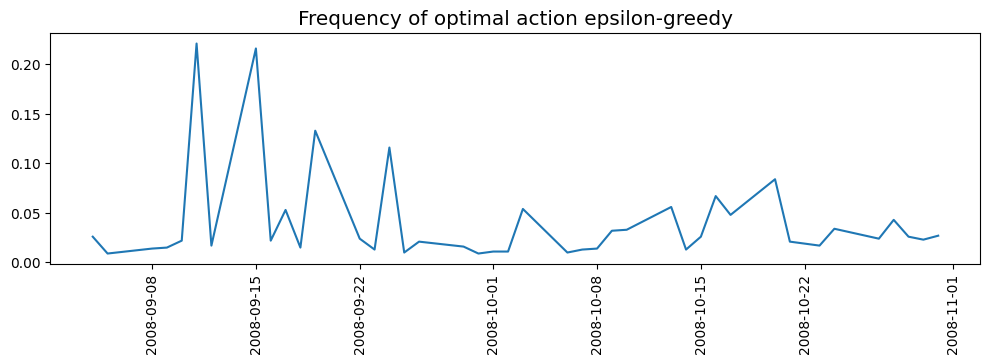

In [37]:
plt.plot(pdata_dates[HOLD:pdata.shape [0] ],optimal_avg)

plt.title("Frequency of optimal action epsilon-greedy", fontsize='x-large')
plt.xticks(rotation=90)
fig = plt.gcf()

fig.set_size_inches(12, 3)

plt.show()

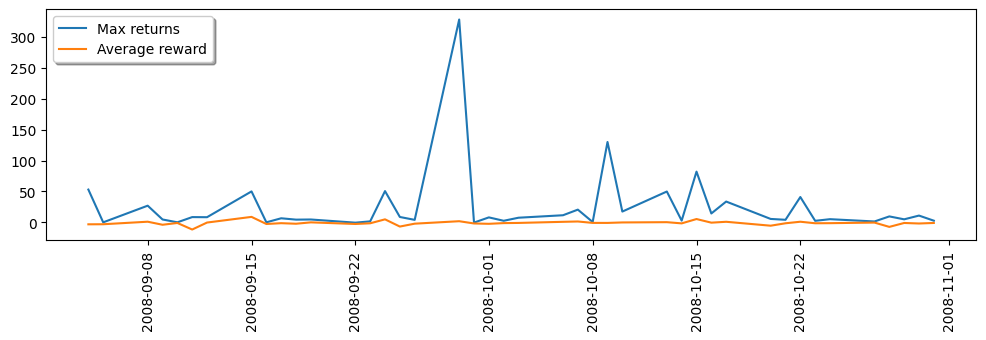

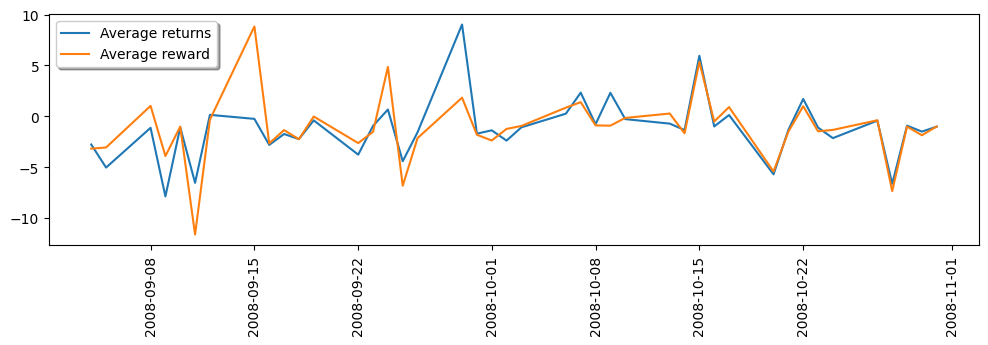

optimal action 0.039952380952380975
Average reward  -1.1487193922232553
Average annualized return from holding the equally-weighted portfolio -1.0 0.0
Average annualized return from holding the Bandit portfolio -1.0 51.23520428538145


In [38]:
plt.plot(pdata_dates[HOLD:pdata.shape [0] ],np.max((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata [0:TMAX,:] , axis=1), label='Max returns')

plt.plot(pdata_dates[HOLD:pdata.shape [0] ],reward_avg, label='Average reward')
plt.xticks(rotation=90)
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 3)
plt.show()

plt.plot(pdata_dates[HOLD:pdata.shape[0] ],np.mean((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:], axis=1), label='Average returns')
plt.plot(pdata_dates[HOLD:pdata.shape[0]],reward_avg, label='Average reward')
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(12, 3)
plt.show()

#	Average frequency of optimal action
print("optimal action",np.mean(optimal_avg))

#	Average reward across steps
print("Average reward ",np.mean(reward_avg))

#	Average annualized return from holding the equally-weighted portfolio
print("Average annualized return from holding the equally-weighted portfolio",(1 + np.mean((pdata[HOLD:pdata.shape[0] ,:]-pdata[0:TMAX,:])/pdata[0:TMAX,:])) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(np.mean((pdata))))

#	Average annualized return from holding the Bandit portfolio
print("Average annualized return from holding the Bandit portfolio",(1+np.mean(reward_avg)) ** (250 / HOLD) - 1 , np.sqrt(250 / HOLD) * np.std(reward_avg))

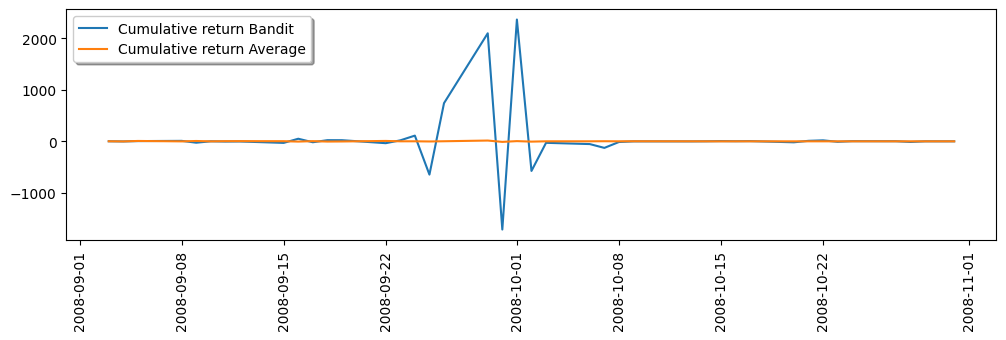

In [39]:
return_cumulative = np.zeros((TMAX+1,2))
return_cumulative[0,0] = 1
return_cumulative[0,1] = 1
for tt in range(1,TMAX+1):
  return_cumulative[tt,0] = return_cumulative[tt-1,0] * ( 1 + reward_avg[tt-1] )
  rmean = np.mean((pdata[tt+HOLD-1,:]-pdata[tt-1,:])/pdata[tt-1,:])
  return_cumulative[tt,1] = return_cumulative[tt-1,1] * ( 1 + rmean )

plt.plot(pdata_dates[HOLD-1:pdata.shape[0]],return_cumulative[:,0], label='Cumulative return Bandit')
plt.plot(pdata_dates[HOLD-1:pdata.shape[0]],return_cumulative[:,1], label='Cumulative return Average')
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 3)
plt.xticks(rotation=90)
plt.show()




# Step 10: Update data

## Import 15 financial companies

Choose tickers

In [40]:
tickers_fin_b = ["JPM","WFC","BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP",
           "PRU", "SCHW"]

Collect data using a data frame for the period between Mar and Apr 2020

In [41]:
df_fin_b = pd.DataFrame()
for i in tickers_fin:
  ydata = yf.download(i, start = '2020-03-01', end = '2020-05-01')
  df_fin_b[i] = ydata['Adj Close']
#df_fin.index = pd.to_datetime(ydata.index, format='%Y-%m-%d')
df_fin_b.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW
Date,,,,,,,,,,,,,
2020-03-02,108.370621,38.377655,26.808290,58.315212,192.560318,41.078987,41.254646,14.371768,115.400002,85.763748,107.949593,66.210289,40.004227
2020-03-03,104.304047,36.806580,25.329586,56.123753,187.007889,39.321865,39.408482,13.728129,109.179337,81.028786,102.394264,62.465351,36.497421
2020-03-04,106.881332,37.596661,25.913763,58.142658,191.889252,39.799534,40.154053,14.134640,112.581116,83.757240,109.684441,64.221329,35.411083
2020-03-05,101.637589,35.326328,24.600166,54.777817,182.742462,37.342979,37.801964,13.533342,105.003220,79.772369,105.171928,60.135197,33.162148
2020-03-06,96.384933,33.682610,23.617258,52.871082,177.282013,36.208542,37.136292,12.593292,99.382843,77.156425,102.612312,58.096283,32.523682


## Import 15 non-financial companies

In [42]:
tickers_nfin_b = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "EQIX", "DUK",
                "NFLX", "GE", "APA", "F", "REGN", "CMS"]

In [43]:
df_nfin_b = pd.DataFrame()
for i in tickers_nfin_b:
  ydata = yf.download(i, start = '2020-03-01', end = '2020-05-01')
  df_nfin_b[i] = ydata['Adj Close']
#df_nfin.index = pd.to_datetime(ydata.index, format='%Y%m%d')
df_nfin_b.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,KR,PFE,XOM,WMT,DAL,CSCO,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,
2020-03-02,27.611349,29.024046,44.751831,109.201492,46.929810,36.643845,583.485107,83.872688,381.049988,68.972809,24.162060,6.278498,464.750000,57.414967
2020-03-03,27.295046,28.541418,42.608925,106.402649,45.954594,35.638077,579.977844,82.953018,368.769989,66.942398,23.660265,6.077935,461.549988,57.576096
2020-03-04,28.802132,30.288855,43.539169,110.040199,48.263268,36.839649,608.573181,88.193405,383.790009,67.373077,23.792810,6.173856,493.480011,61.183552
2020-03-05,31.137192,29.506672,41.620525,109.239204,44.790302,35.219742,581.401428,86.874649,372.779999,62.020157,23.044849,5.877372,488.170013,60.628559
2020-03-06,29.806860,29.140537,39.610516,110.473671,45.666008,35.317657,573.859009,85.937622,368.970001,57.893692,19.598537,5.659368,494.429993,60.771778


## Merge into a single data-structure and compute the returns

We combine the two list of time series:

In [44]:
df_b = pd.DataFrame()

In [45]:
df_b = pd.concat([df_nfin_b, df_fin_b],axis=1)
df_b.head()

,KR,PFE,XOM,WMT,DAL,CSCO,EQIX,DUK,NFLX,GE,...,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,27.611349,29.024046,44.751831,109.201492,46.929810,36.643845,583.485107,83.872688,381.049988,68.972809,...,58.315212,192.560318,41.078987,41.254646,14.371768,115.400002,85.763748,107.949593,66.210289,40.004227
2020-03-03,27.295046,28.541418,42.608925,106.402649,45.954594,35.638077,579.977844,82.953018,368.769989,66.942398,...,56.123753,187.007889,39.321865,39.408482,13.728129,109.179337,81.028786,102.394264,62.465351,36.497421
2020-03-04,28.802132,30.288855,43.539169,110.040199,48.263268,36.839649,608.573181,88.193405,383.790009,67.373077,...,58.142658,191.889252,39.799534,40.154053,14.134640,112.581116,83.757240,109.684441,64.221329,35.411083
2020-03-05,31.137192,29.506672,41.620525,109.239204,44.790302,35.219742,581.401428,86.874649,372.779999,62.020157,...,54.777817,182.742462,37.342979,37.801964,13.533342,105.003220,79.772369,105.171928,60.135197,33.162148
2020-03-06,29.806860,29.140537,39.610516,110.473671,45.666008,35.317657,573.859009,85.937622,368.970001,57.893692,...,52.871082,177.282013,36.208542,37.136292,12.593292,99.382843,77.156425,102.612312,58.096283,32.523682


Comput the returns

In [46]:
df_b_returns = df_b.pct_change(axis=0) # daily returns
df_b_returns = df_b_returns.dropna()
df_b_returns.head()

,KR,PFE,XOM,WMT,DAL,CSCO,EQIX,DUK,NFLX,GE,...,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-03,-0.011456,-0.016629,-0.047884,-0.025630,-0.020780,-0.027447,-0.006011,-0.010965,-0.032227,-0.029438,...,-0.037580,-0.028835,-0.042774,-0.044750,-0.044785,-0.053905,-0.055209,-0.051462,-0.056561,-0.087661
2020-03-04,0.055215,0.061225,0.021832,0.034187,0.050238,0.033716,0.049304,0.063173,0.040730,0.006434,...,0.035972,0.026102,0.012148,0.018919,0.029611,0.031158,0.033673,0.071197,0.028111,-0.029765
2020-03-05,0.081072,-0.025824,-0.044067,-0.007279,-0.071959,-0.043972,-0.044648,-0.014953,-0.028688,-0.079452,...,-0.057872,-0.047667,-0.061723,-0.058577,-0.042541,-0.067311,-0.047576,-0.041141,-0.063626,-0.063509
2020-03-06,-0.042725,-0.012409,-0.048294,0.011301,0.019551,0.002780,-0.012973,-0.010786,-0.010220,-0.066534,...,-0.034809,-0.029881,-0.030379,-0.017609,-0.069462,-0.053526,-0.032793,-0.024337,-0.033905,-0.019253
2020-03-09,-0.024657,-0.035979,-0.122248,-0.000597,-0.051645,-0.043347,-0.056862,-0.045129,-0.060926,-0.126596,...,-0.161717,-0.103915,-0.144405,-0.103729,-0.182246,-0.135516,-0.112043,-0.091925,-0.165735,-0.113097


In [47]:
zero_values = (df_b_returns == 0).sum().sum()

if zero_values > 0:
    print(f"There are {zero_values} zero values in the dataset.")
else:
    print("There are no zero values in the dataset.")

There are 3 zero values in the dataset.


In [48]:
df_b_returns = df_b_returns.replace(0, 0.01)


zero_values = (df_b_returns == 0).sum().sum()

if zero_values > 0:
    print(f"There are {zero_values} zero values in the dataset.")
else:
    print("There are no zero values in the dataset.")

There are no zero values in the dataset.


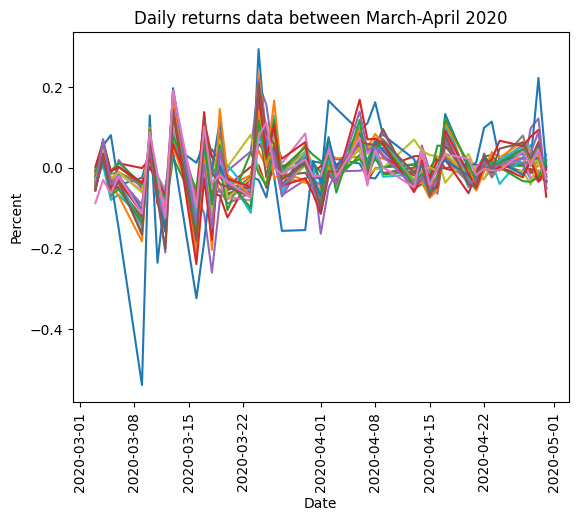

In [49]:
plt.plot(df_b_returns.index,df_b_returns)
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Daily returns data between March-April 2020")
plt.xticks(rotation=90)
plt.show()

# Step 11

### a) UCB algorithm

In [50]:
pdata = df_b_returns.to_numpy()
pdata_dates = pd.to_datetime(df_b_returns.index, format='%Y-%m-%d')


#	Bandit problem for stock selection
NK = pdata.shape[1]

EPSILON = 0.0    # e-greedy setting TURNED OFF
ALPHA =0.9
NEPISODES = 1000
HOLD = 5
TMAX = pdata.shape[0] - HOLD

#	NEW PARAMETER
UCB_WEIGHT =2.0    # UCB setting TURNED ON
seed(1234)
reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))
reward_queue = np.zeros((HOLD,2))

for run in range(NEPISODES):
# Initialize q function and actions record
  qvalue = np.zeros((NK))
  qvalue_up = np.zeros((NK))
  nactions = np.zeros((NK))

  for tt in range(TMAX):
    aa_opt = optimal_action(qvalue_up,EPSILON)
    nactions[aa_opt] += 1

  #	Compute reward as return over holding period
    reward_queue[HOLD-1,0] = (pdata[tt+HOLD,aa_opt]-pdata[tt,aa_opt])/pdata[tt,aa_opt]
    reward_queue[HOLD-1,1] = aa_opt

#	Update Q function using action chosen HOLD days before

    qvalue = reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, ALPHA)

    #qvalue = reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, 1/nactions[aa_opt])
    #print(qvalue)

   #	Upper-confidence adjustment

    qvalue_up = np.zeros((NK))
    for aa in range(NK):
      # If an action has not been visited simply give it the maximum value across actions
      if nactions[aa] == 0:
        qvalue_up[aa] = np.max(qvalue_up) +1.0
      else:
        qvalue_up[aa] = qvalue[aa] + UCB_WEIGHT * np.sqrt(np.log(tt+1)/nactions[aa])

    reward_queue[0:HOLD-1,:] = reward_queue[1:HOLD,:]
    reward_avg[tt] += reward_queue[HOLD-1,0]/NEPISODES
    optimal_avg[tt] += (aa_opt==np.argmax((pdata[tt+HOLD,:]-pdata[tt,:])/pdata[tt,:]))/NEPISODES



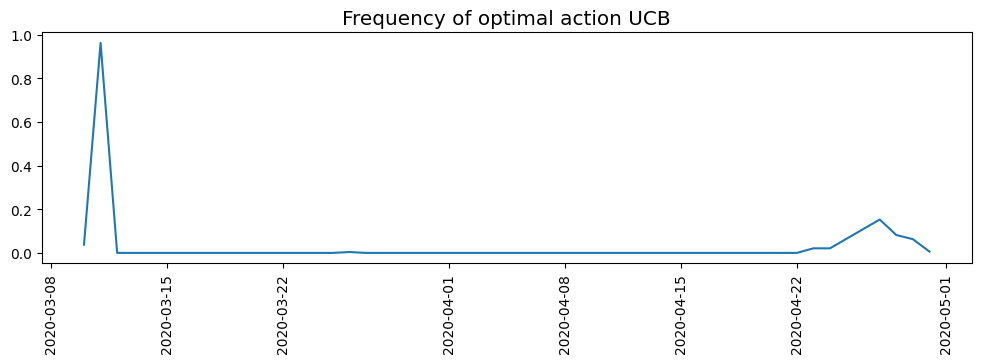

In [51]:
plt.plot(pdata_dates[HOLD:pdata.shape [0] ],optimal_avg)

plt.title("Frequency of optimal action UCB", fontsize='x-large')
plt.xticks(rotation=90)
fig = plt.gcf()

fig.set_size_inches(12, 3)

plt.show()

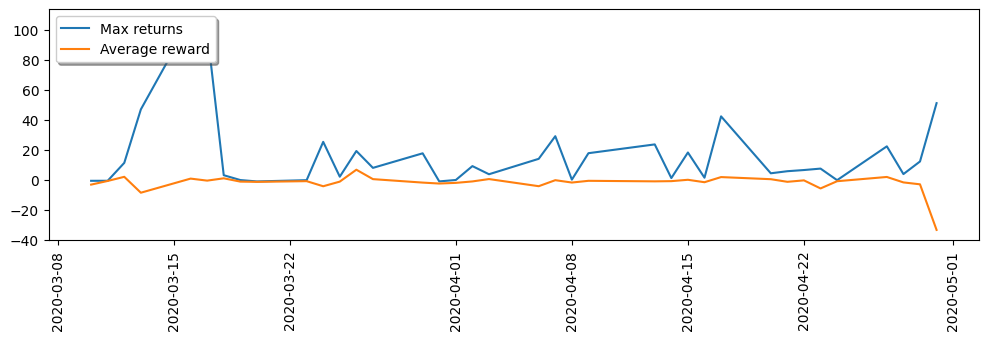

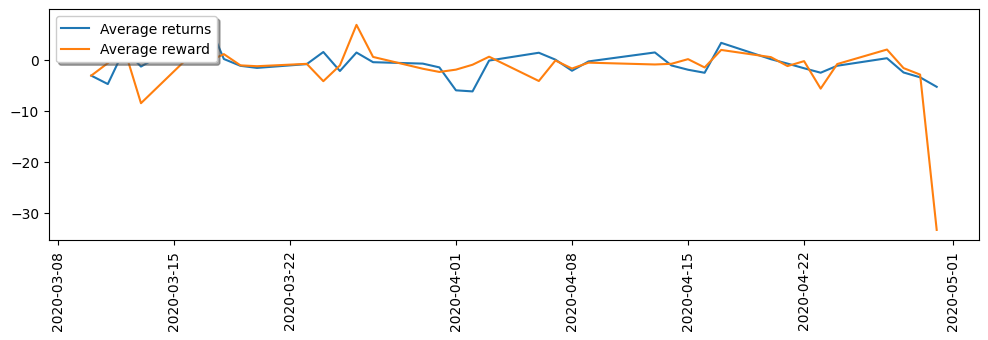

0.03651351351351353
-1.0 0.0
-0.9999986984228465 40.87261201565781


In [52]:
plt.plot(pdata_dates[HOLD:pdata.shape [0] ],np.max((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata [0:TMAX,:] , axis=1), label='Max returns')

plt.plot(pdata_dates[HOLD:pdata.shape [0] ],reward_avg, label='Average reward')
plt.xticks(rotation=90)
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 3)
plt.show()

plt.plot(pdata_dates[HOLD:pdata.shape[0] ],np.mean((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:], axis=1), label='Average returns')
plt.plot(pdata_dates[HOLD:pdata.shape[0]],reward_avg, label='Average reward')
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(12, 3)
plt.show()

#	Average frequency of optimal action
print(np.mean(optimal_avg))

#	Average annualized return from holding the equally-weighted portfolio
print((1 + np.mean((pdata[HOLD:pdata.shape[0] ,:]-pdata[0:TMAX,:])/pdata[0:TMAX,:])) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(np.mean((pdata))))

#	Average annualized return from holding the Bandit portfolio
print((1+np.mean(reward_avg)) ** (250 / HOLD) - 1 , np.sqrt(250 / HOLD) * np.std(reward_avg))

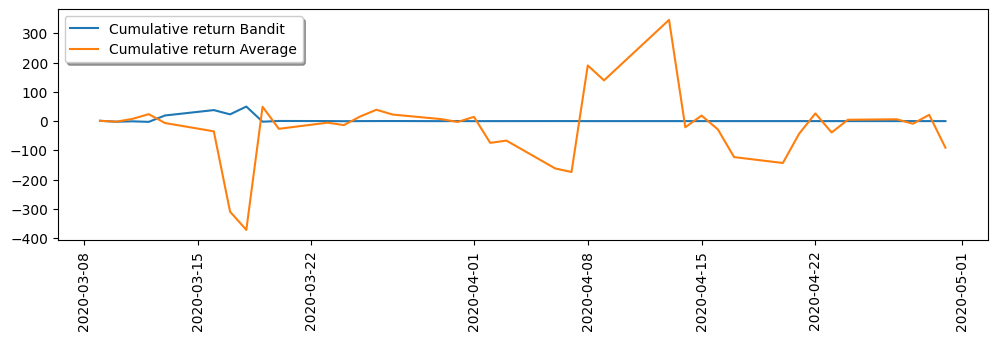

In [53]:
return_cumulative = np.zeros((TMAX+1,2))
return_cumulative[0,0] = 1
return_cumulative[0,1] = 1
for tt in range(1,TMAX+1):
  return_cumulative[tt,0] = return_cumulative[tt-1,0] * ( 1 + reward_avg[tt-1] )
  rmean = np.mean((pdata[tt+HOLD-1,:]-pdata[tt-1,:])/pdata[tt-1,:])
  return_cumulative[tt,1] = return_cumulative[tt-1,1] * ( 1 + rmean )

plt.plot(pdata_dates[HOLD-1:pdata.shape[0]],return_cumulative[:,0], label='Cumulative return Bandit')
plt.plot(pdata_dates[HOLD-1:pdata.shape[0]],return_cumulative[:,1], label='Cumulative return Average')
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 3)
plt.xticks(rotation=90)
plt.show()

### b) e-greedy algorithm

In [54]:
pdata = df_b_returns.to_numpy()
pdata_dates = pd.to_datetime(df_b_returns.index, format='%Y-%m-%d')


#	Bandit problem for stock selection
NK = pdata.shape[1]

EPSILON = 0.4
ALPHA =0.9
NEPISODES = 1000
HOLD = 5
TMAX = pdata.shape[0] - HOLD

#	NEW PARAMETER
UCB_WEIGHT =0.0
seed(1234)
reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))
reward_queue = np.zeros((HOLD,2))

for run in range(NEPISODES):
# Initialize q function and actions record
  qvalue = np.zeros((NK))
  qvalue_up = np.zeros((NK))
  nactions = np.zeros((NK))

  for tt in range(TMAX):
    aa_opt = optimal_action(qvalue_up,EPSILON)
    nactions[aa_opt] += 1

  #	Compute reward as return over holding period
    reward_queue[HOLD-1,0] = (pdata[tt+HOLD,aa_opt]-pdata[tt,aa_opt])/pdata[tt,aa_opt]
    reward_queue[HOLD-1,1] = aa_opt

#	Update Q function using action chosen HOLD days before

    #qvalue = reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, ALPHA)

    qvalue = reward_update(int(reward_queue[0,1]), reward_queue[0,0], qvalue, 1/nactions[aa_opt])
    #print(qvalue)

   #	Upper-confidence adjustment

    qvalue_up = np.zeros((NK))
    for aa in range(NK):
      # If an action has not been visited simply give it the maximum value across actions
      if nactions[aa] == 0:
        qvalue_up[aa] = np.max(qvalue_up) +1.0
      else:
        qvalue_up[aa] = qvalue[aa] + UCB_WEIGHT * np.sqrt(np.log(tt+1)/nactions[aa])

    reward_queue[0:HOLD-1,:] = reward_queue[1:HOLD,:]
    reward_avg[tt] += reward_queue[HOLD-1,0]/NEPISODES
    optimal_avg[tt] += (aa_opt==np.argmax((pdata[tt+HOLD,:]-pdata[tt,:])/pdata[tt,:]))/NEPISODES

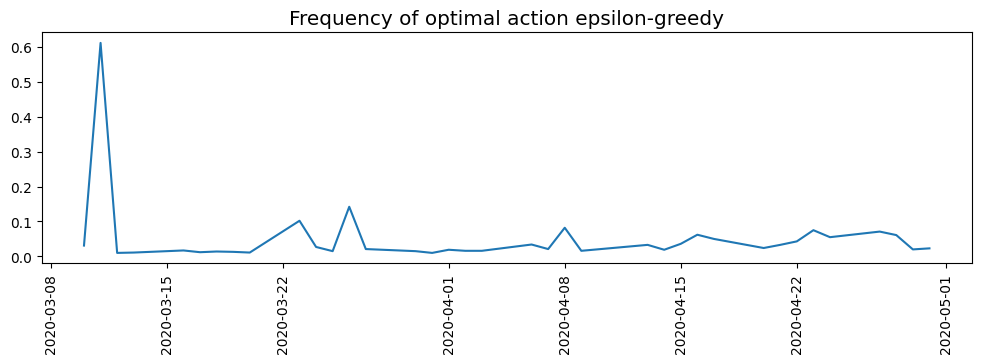

In [55]:
plt.plot(pdata_dates[HOLD:pdata.shape [0] ],optimal_avg)

plt.title("Frequency of optimal action epsilon-greedy", fontsize='x-large')
plt.xticks(rotation=90)
fig = plt.gcf()

fig.set_size_inches(12, 3)

plt.show()

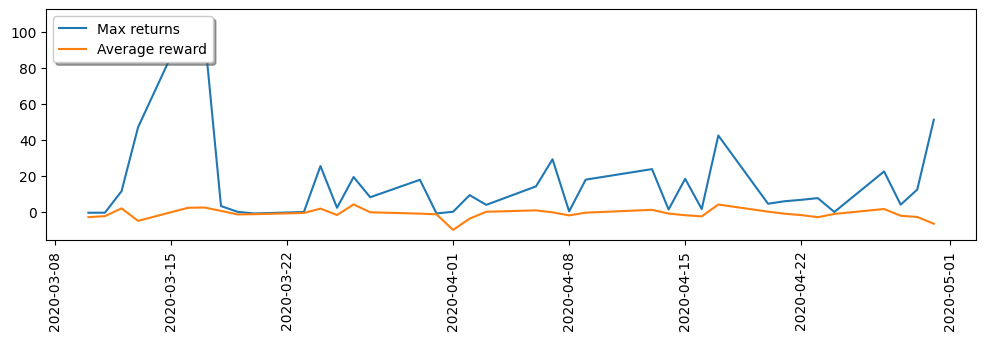

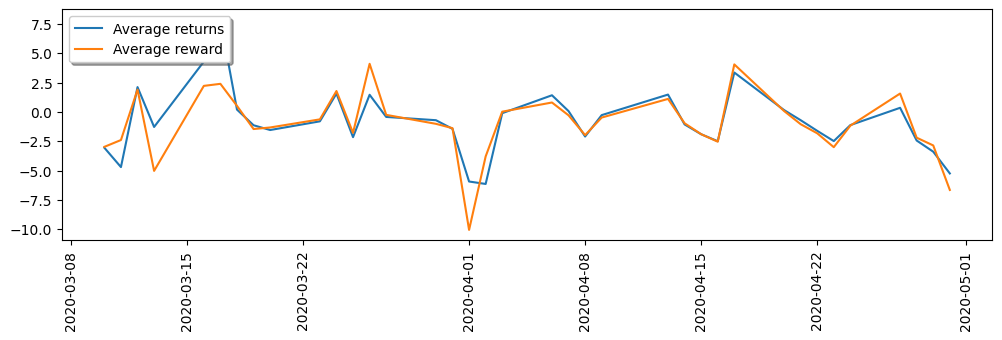

0.05056756756756759
-1.0 0.0
-1.0 19.05730139077147


In [56]:
plt.plot(pdata_dates[HOLD:pdata.shape [0] ],np.max((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata [0:TMAX,:] , axis=1), label='Max returns')

plt.plot(pdata_dates[HOLD:pdata.shape [0] ],reward_avg, label='Average reward')
plt.xticks(rotation=90)
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 3)
plt.show()

plt.plot(pdata_dates[HOLD:pdata.shape[0] ],np.mean((pdata[HOLD:pdata.shape[0],:]-pdata[0:TMAX,:])/pdata[0:TMAX,:], axis=1), label='Average returns')
plt.plot(pdata_dates[HOLD:pdata.shape[0]],reward_avg, label='Average reward')
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(12, 3)
plt.show()

#	Average frequency of optimal action
print(np.mean(optimal_avg))

#	Average annualized return from holding the equally-weighted portfolio
print((1 + np.mean((pdata[HOLD:pdata.shape[0] ,:]-pdata[0:TMAX,:])/pdata[0:TMAX,:])) ** (250 / HOLD) - 1,np.sqrt(250 / HOLD) * np.std(np.mean((pdata))))

#	Average annualized return from holding the Bandit portfolio
print((1+np.mean(reward_avg)) ** (250 / HOLD) - 1 , np.sqrt(250 / HOLD) * np.std(reward_avg))

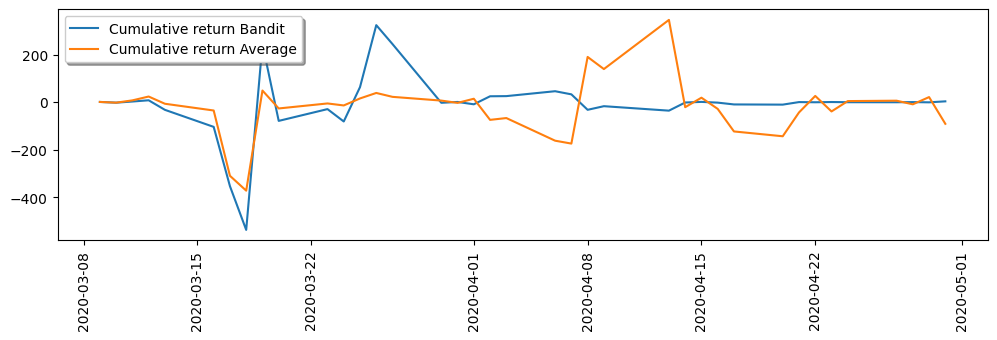

In [57]:
return_cumulative = np.zeros((TMAX+1,2))
return_cumulative[0,0] = 1
return_cumulative[0,1] = 1
for tt in range(1,TMAX+1):
  return_cumulative[tt,0] = return_cumulative[tt-1,0] * ( 1 + reward_avg[tt-1] )
  rmean = np.mean((pdata[tt+HOLD-1,:]-pdata[tt-1,:])/pdata[tt-1,:])
  return_cumulative[tt,1] = return_cumulative[tt-1,1] * ( 1 + rmean )

plt.plot(pdata_dates[HOLD-1:pdata.shape[0]],return_cumulative[:,0], label='Cumulative return Bandit')
plt.plot(pdata_dates[HOLD-1:pdata.shape[0]],return_cumulative[:,1], label='Cumulative return Average')
legend = plt.legend(loc='upper left', shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 3)
plt.xticks(rotation=90)
plt.show()